## Step 1: Prepare Project

Load libraries                                                         

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from pandas.plotting import scatter_matrix
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [24]:
# Load dataset
iris = load_iris()

## Step 2: Define Problem

What is your task? What are your goals? What do you want to achieve?


The task of this project is to take and examine the iris dataset. Our goal is to observe the dataset and to apply a set of algorithms in order to achieve the best classification. After choosing the best accuracy value, we perform the needed predictions

## Step 3: Exploratory Analysis                                               

Understand your data: Take a “peek” of your data, answer basic questions about the dataset. Summarise your data. Explore descriptive statistics and visualisations.

In [25]:
# Creates pandas dataFrame
data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

In [26]:
# Dimensions of the dataset
data.shape

(150, 5)

In [27]:
# A peek of the data
data.head(20)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
5,5.4,3.9,1.7,0.4,0.0
6,4.6,3.4,1.4,0.3,0.0
7,5.0,3.4,1.5,0.2,0.0
8,4.4,2.9,1.4,0.2,0.0
9,4.9,3.1,1.5,0.1,0.0


In [28]:
# Statistical summary of all attributes
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [29]:
# The class distribution (number of instances per class)
data.groupby('target').size()

target
0.0    50
1.0    50
2.0    50
dtype: int64

From the above result, we observe that each class has 50 instances. 

<IPython.core.display.Javascript object>


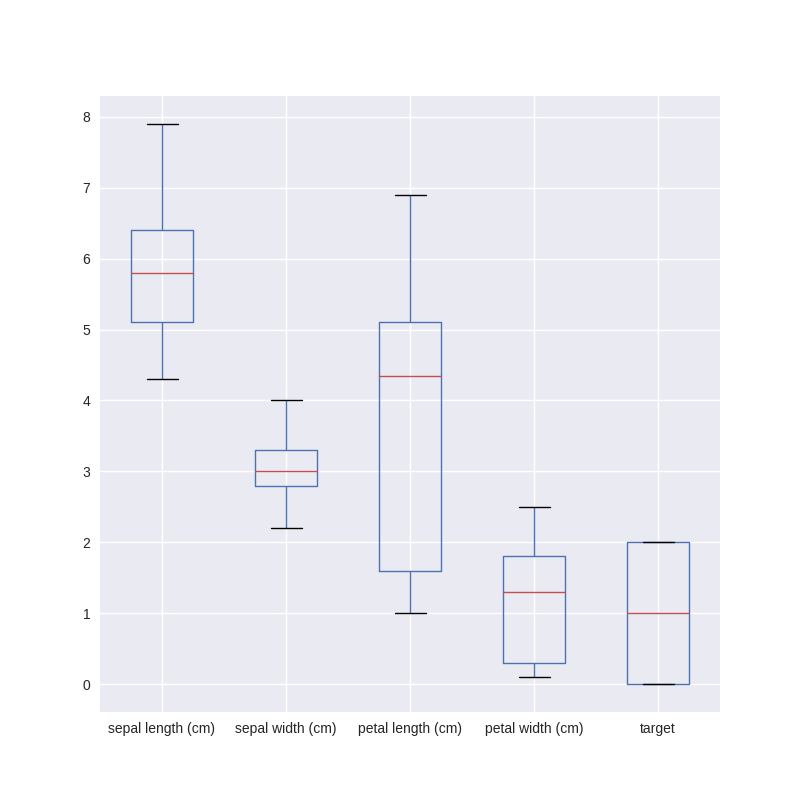

In [30]:
#Univariate plots to better understand each attribute
data.plot(kind='box', layout=(2,2), sharex=False, sharey=False, figsize=(8,8))
plt.show()

In the above plot, it is expected to observe the precise outliers. Nevertheless, we can see the whiskers that define that outliers exist.

<IPython.core.display.Javascript object>


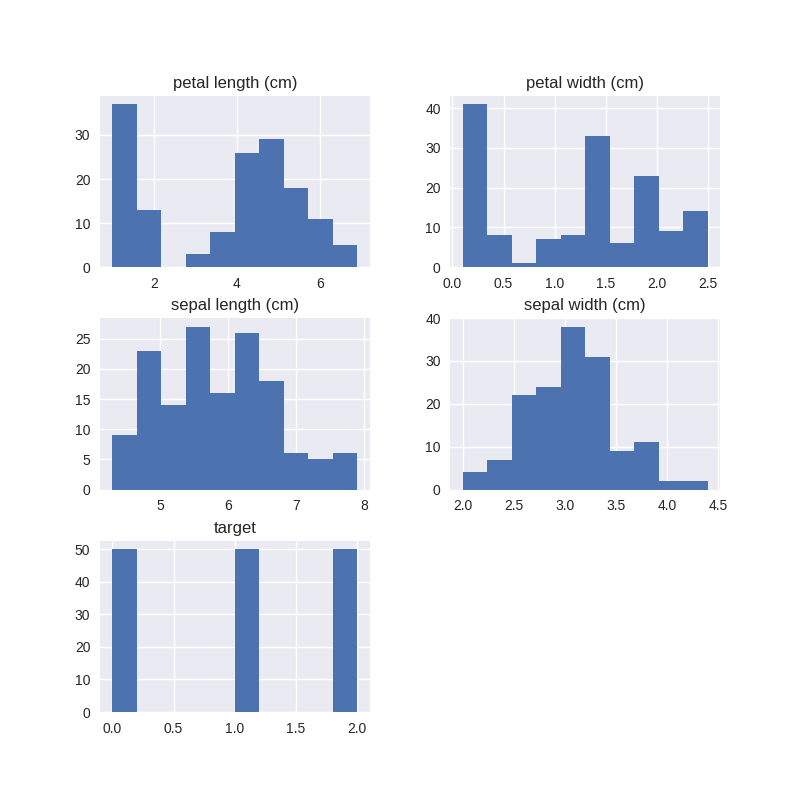

In [31]:
# Below we can see the histograms that show the distribution
data.hist(figsize=(8,8))
plt.show()

<IPython.core.display.Javascript object>


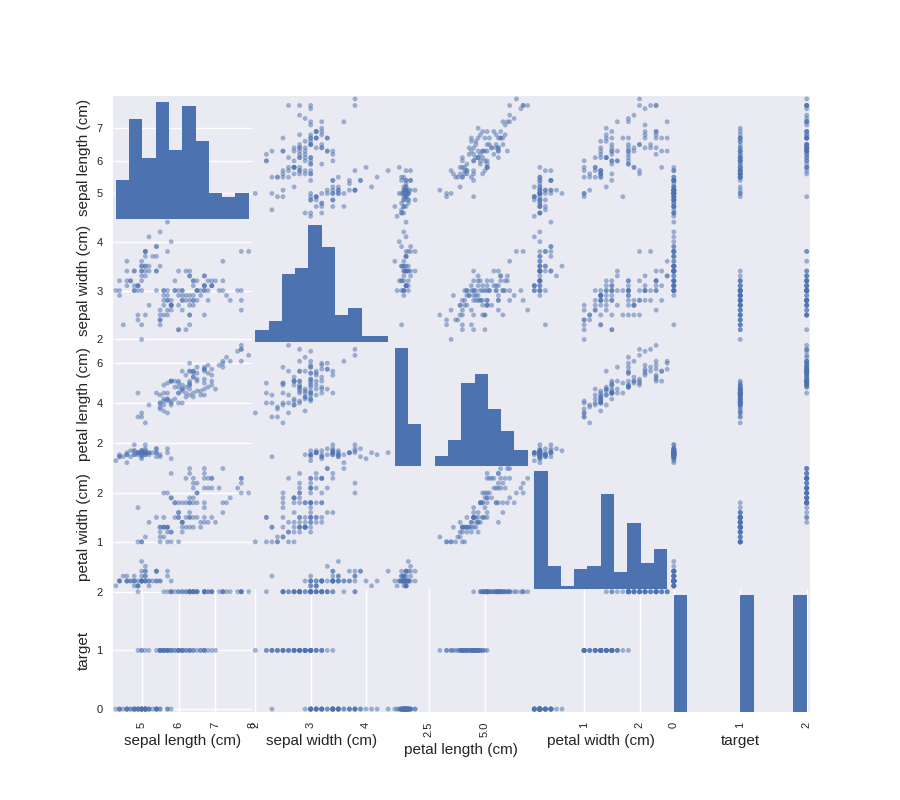

In [32]:
# Multivariate plots to better understand relationships between attributes
scatter_matrix(data, figsize=(9,8))
plt.show()

## Step 4: Prepare Data

Data Cleaning/Data Wrangling/Collect more data (if necessary).


#Data cleaning 

As for the data cleaning, we observe that each class contains 50 instances. So we are not going to do data cleaning.

In [33]:
X_data = data.drop(['target'], axis = 1)

## Step 5: Feature Engineering

 As for the data wrangling, at the begining I checked for correlations between the features. After that, I scaled  data and I chose to drop one feature with high correlation. But I observed that the accuracy score was smaller after the above. So I decided not to do any of these.

## Step 6: Algorithm Selection                                            

Select a set of algorithms to apply, select evaluation metrics, and evaluate/compare algorithms.

In [34]:
# Create a list, with one item per algorithm. Each item has a name, and a classifier object.
models = []
models.append(('LR',  LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('kNN', KNeighborsClassifier()))
models.append(('DT',  DecisionTreeClassifier()))
models.append(('NB',  GaussianNB()))
models.append(('SVM', SVC()))

In [35]:
# The scoring function 
scoring = 'accuracy'

In [36]:
# We are going to evaluate all classifiers, and store results in two lists:
results = []
names   = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=7)
    cv_results = cross_val_score(model, X_data, data.target, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print("%03s: %f (+/- %f)" % (name, cv_results.mean(), cv_results.std()))

 LR: 0.880000 (+/- 0.148474)
LDA: 0.966667 (+/- 0.061464)
kNN: 0.933333 (+/- 0.084327)
 DT: 0.926667 (+/- 0.091652)
 NB: 0.946667 (+/- 0.058119)
SVM: 0.953333 (+/- 0.052068)


<IPython.core.display.Javascript object>


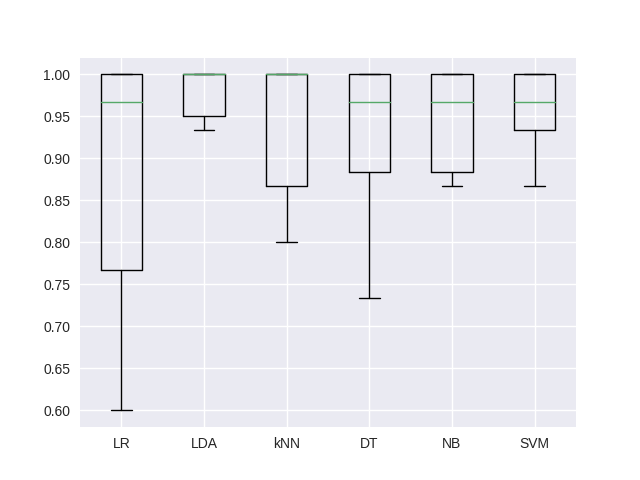

In [37]:
import matplotlib.pyplot as plt
%matplotlib notebook

plt.boxplot(results)
plt.xticks(list(range(1,len(names)+1)), names)
plt.show()

Using Kfold, it is obvious that the best algorithm for out dataset is LinearDiscriminantAnalysis because of the values of accuracy

## Step 7: Model Training

We split our data to train and validation.

In [38]:
X_train, X_validation, Y_train, Y_validation = train_test_split(X_data, data.target, test_size=0.20, random_state=7)

In [39]:
LDA = LinearDiscriminantAnalysis()
LDA_model = LDA.fit(X_train, Y_train)

In [40]:
predictions = LDA_model.predict(X_validation)

In [41]:
acc = accuracy_score(predictions, Y_validation)

In [42]:
print acc

0.966666666667


We can see that the accuracy is close to 1 and more specifically the same with kFold.

In [43]:
print (confusion_matrix(Y_validation, predictions))


[[ 7  0  0]
 [ 0 11  1]
 [ 0  0 11]]


[[ 7  0  0]
 [ 0 11  1]
 [ 0  0 11]]


<IPython.core.display.Javascript object>


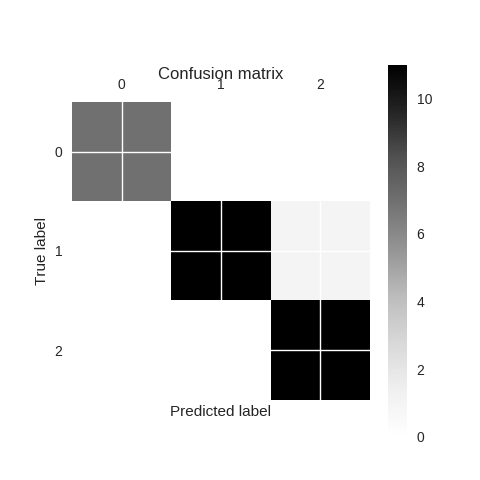

In [44]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(Y_validation, predictions)
cm = confusion_matrix(Y_validation, predictions)
cm = confusion_matrix(Y_validation, predictions)
print cm
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

From the above plot, we can see that we have a miss. This is why the accuracy is not 1.